# Trabalho 1 LC-20/21 LCC

Grupo 5  
Filipe Barbosa A77252  
Hugo Ferreira A78555

In [55]:
from z3 import *

### Problema 2

#### Hipótese: 
Existem $N$ pombos  e $N-1$ poleiros de pombos. Cada pombo ocupa totalmente um poleiro. Pretende-se alocar cada pombo a um poleiro próprio.

### a. Provar que não existe solução do problema, usando  Z3 em:

#### I. Lógica proposicional

Para começar temos de restringir que, para cada pombo $i$ (com $N$ pombos), este ocupa um dos poleiros $j$ (com $N-1$ poleiros):

$$
\bigwedge_{i=0}^{N} \bigvee_{j=0}^{N-1} p_{i,j}
\tag{I.1}
$$


De seguida inferimos que, para todos os pombos ocuparem um poleiro é necessário, num desses poleiros $j$, encontrar-se dois pombos ($i$ e $k$), devido a termos $N$ pombos e $N-1$ poleiros:
$$
\bigvee_{j=0}^{N-1} \bigvee_{1 \leq i<k \leq N} (p_{i,j} \wedge p_{k,j})
\tag{I.2}
$$


Para finalizar, partindo da hipótese, e das conclusões tiradas anteriormente, deduzimos que cada pombo $i$ tem de ter o seu próprio, e único, poleiro $j$:

O pombo $i$ não pode ocupar o poleiro $j$ e $k$:
$$
\bigwedge_{i=0}^{N} \bigwedge_{1 \leq j<k \leq N-1} \neg (p_{i,j} \wedge p_{i,k})
\tag{I.3}
$$

Para qualquer poleiro $j$, este não pode ser ocupado pelo pombo $i$ e pelo pombo $k$:
$$
\bigwedge_{j=0}^{N-1} ( \bigwedge_{i=0}^{N} p_{i,j} \rightarrow 
\bigwedge_{k=i+1}^{N} \neg p_{k,j} )
\tag{I.4}
$$

In [56]:
def pigeon_hole(N):
    s = Solver()
    x = {}
    
    #criar as variaveis
    for i in range(N):
        x[i] = {}
        for j in range(N-1):
            x[i][j] = Bool("p_"+str(i)+", b_"+str(j))
  
    #I.1 - cada pombo num buraco
    for i in range(N):
        s.add(Or([x[i][k] for k in range(N-1)]))
    
    #I.3 - pombo i nao pode ocupar poleiro i e k
    for i in range(N):
        for j in range(N-1):
            s.add(Not(And(x[i][j],Or([x[i][k] for k in range(j+1,N-1)]))))

    #I.4 - poleiro j nao pode ser ocupado por pombo i e k
    for i in range(N):
        for j in range(N-1):
            for k in range(i+1,N):
                s.add(Implies(x[i][j],Not(x[k][j])))
                
    print(s.check())

    
N=10
pigeon_hole(N)

unsat


Após executar o código a cima, com auxílio do Z3, é nos dada como resposta $unsat$. Esta resposta permite chegarmos á conclusão que não é possível satisfazer a hipótese.

Da hipótese, como temos $N$ pombos  e $N-1$ poleiros, vai chegar uma altura que $p_{i,j}$ e $p_{k,j}$, o que contraria a fórmula I.4.

#### II. Lógica inteira linear

Começamos agora por mostrar que cada pombo $i$ está no buraco $j$ se $p_{i,j} = 1$. Ou que não ocupa esse buraco se $p_{i,j}$ = 0.

$$
\forall_{i=0}^{N} \forall_{j=0}^{N-1} \cdot 0 \leq p_{i,j} \leq 1 \tag{II.1}
$$

De seguida, restringe-se que cada pombo pode apenas ocupar um buraco. O somatório de todos os pombos $i$ para cada buraco $j$ (de $j=0$ até $j=N-1$) é 1.

$$
\forall_{i=0}^{N} \cdot \sum_{j=0}^{N-1} p_{i,j} = 1 \tag{II.2}
$$

Restringe-se agora que cada buraco apenas pode ser ocupado por um pombo. O somatório de todos os buracos $j$ com cada pombo $i$ (de $i=0$ até $i=N$) é 1.

$$
\forall_{j=0}^{N-1} \cdot \sum_{i=0}^{N} p_{i,j} = 1 \tag{II.3}
$$

In [57]:
def pigeon_holeLIA(N):
    sLIA = Solver()
    xLIA = {}
    
    #II.1 - cada pombo ocupa ou nao um buraco
    for i in range(N):
        for j in range(N-1):
            xLIA[i,j] = Int("p_"+str(i)+", b_"+str(j))
            sLIA.add(xLIA[i,j] >= 0, xLIA[i,j] <= 1)
    
    #II.2 - pombo i pode ocupar apenas um buraco
    for i in range(N):
        sLIA.add(Sum([xLIA[i,j] for j in range(N-1)]) == 1)
    
    #II.3 - buraco j apenas pode ser ocupado por um pombo
    for j in range(N-1):
        sLIA.add(Sum([xLIA[k,j] for k in range(N)]) == 1)

    print(sLIA.check())

    
nLIA = 10
pigeon_holeLIA(nLIA)

unsat


### b. Analisar a complexidade de cada uma das provas em função de $N$ de forma empírica.

In [58]:
from timeit import timeit
from matplotlib import pyplot as plt

#### a.I. Lógica proposional

Para analisar o tempo de complexidade começamos por identificar, numa lista, a quantidade de pombos ($N$) que queremos usar para calcular o tempo de execução.

In [59]:
nTimeList = [1,3,5,7,9]

Fazemos de seguida o tempo de execução para esses valores, com auxilio da biblioteca timeit do python. Neste caso fazemos para uma média de 3 execuções para cada $N$.

In [60]:
plotLP = {}

for i in nTimeList:
    nTime = i
    time = timeit(setup="from __main__ import pigeon_hole, nTime", stmt="pigeon_hole(nTime)", number=3)/3
    print("Tempo de execução com "+str(i)+" pombos: ",time)
    plotLP[i] = time

unsat
unsat
unsat
Tempo de execução com 1 pombos:  0.011555399999906513
unsat
unsat
unsat
Tempo de execução com 3 pombos:  0.013896799999959816
unsat
unsat
unsat
Tempo de execução com 5 pombos:  0.02620316666677051
unsat
unsat
unsat
Tempo de execução com 7 pombos:  0.042214733333366894
unsat
unsat
unsat
Tempo de execução com 9 pombos:  0.362233333333279


Agora com os valores do tempo de execução calculados fazemos um gráfico, usando a biblioteca matplotlib do python, para auxilio da análise de complexidade.

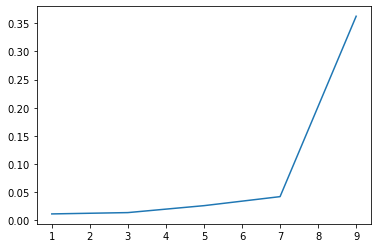

In [61]:
plt.plot(nTimeList,list(plotLP.values()))

Agora com auxilio do gráfico inferimos que a curvatura é exponencial, provando assim que a nossa resolução é de tempo exponencial.  
Uma explicação para isso é que para o tempo de execução contribui principalmente o SAT solver que no pior caso sabemos que é exponecial no número de variáveis, que é superior ao tempo de execução das nossas restrições.

#### a.II. Lógica inteira linear

Começamos por usar a quantidade de pombos já definida e de seguida calculamos o tempo de execução, como fazemos para a lógica anterior com igual média de 3 execuções para cada $N$.

In [62]:
plotLIA = {}

for i in nTimeList:
    nLIATime = i
    time = timeit(setup="from __main__ import pigeon_holeLIA, nLIATime", stmt="pigeon_holeLIA(nLIATime)", number=3)/3
    print("Tempo de execução com "+str(i)+" pombos: ",time)
    plotLIA[i] = time

unsat
unsat
unsat
Tempo de execução com 1 pombos:  0.012164566666645745
unsat
unsat
unsat
Tempo de execução com 3 pombos:  0.014814366666693482
unsat
unsat
unsat
Tempo de execução com 5 pombos:  0.01737930000005387
unsat
unsat
unsat
Tempo de execução com 7 pombos:  0.021953699999964254
unsat
unsat
unsat
Tempo de execução com 9 pombos:  0.03255509999992986


Novamente repetimos o processo de criação de um gráfico com os tempos agora calculados.

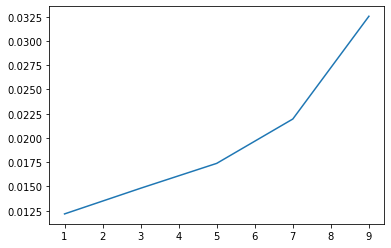

In [63]:
plt.plot(nTimeList,list(plotLIA.values()))

Após análise do gráfico concluimos que a curva é semelhante à de uma função quadrática. Vemos então que o SAT solver não executa no pior caso, e utilizando a lógica linear inteira temos um tempo de execução quadrático.

Representamos agora os dois gráficos juntos para melhor comparação.

Text(0, 0.5, 'Tempo de execução (s)')

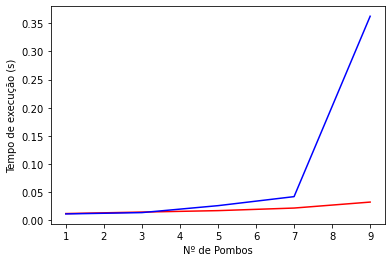

In [64]:
plt.plot(nTimeList,list(plotLIA.values()),  'r', nTimeList,list(plotLP.values()), 'b')
plt.xlabel('Nº de Pombos')
plt.ylabel('Tempo de execução (s)')

Concluimos então que a execução com recurso à lógica inteira linear é muito mais rápida.